# 다중 분류 - 아이리스 품종 분류

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# X data는 정규화
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(iris.data)
X_scaled.shape

(150, 4)

In [4]:
# Y data는 One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_onehot = to_categorical(iris.target)
Y_onehot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [5]:
# Y는 2차원이므로 대문자로 표기
Y_onehot.shape

(150, 3)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y_onehot, stratify=Y_onehot, test_size=0.2, random_state=seed
)
# input(150,4) input_dim=4
# output(150,3), Dense=3, softmax => output 노드가 3개 => 즉, 활성화함수는 sigmoid가 아닌 softmax 사용
# ML의 logistic Regression -> predict_proba = 0.2, 0.7, 0.1이라면 predict는 0, 1, 0
#   DL에서는 이 역할을 활성화 함수인 softmax가 해준다.
# 이진분류의 loss함수는 binary_crossentropy
# 다중분류의 loss함수는 categorical_crossentrop
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

- 모델 정의/설정/학습/평가

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential([
    Dense(16, input_dim=4, activation='relu'),   # Hidden Layer ///// 중간과정의 활성화함수는 relu
    Dense(3, activation='softmax')               # Output Layer
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',        # 다중 분류시 오차 함수
    metrics=['accuracy']    
)

In [19]:
history = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=200, batch_size=50, verbose=0    # verbose=0 => 결과를 보지 않고 넘어가겠다!
)

In [20]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.3101 - accuracy: 0.8667


[0.31006133556365967, 0.8666666746139526]

- 모델 저장/로드
    - 모델을 저장하고, 파일이 잘 만들어졌는지 확인하기 위한 방법은 다음과 같다.
    -   `!ls -al *.h5`

In [21]:
!mkdir model

In [22]:
model.save('model/iris.h5')     # 딥러닝에는 h5라는 레이블을 달아줌

In [23]:
from tensorflow.keras.models import load_model
my_model = load_model('model/iris.h5')

In [24]:
my_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 146ms/step - loss: 0.3101 - accuracy: 0.8667


[0.31006133556365967, 0.8666666746139526]

- 학습과정 시각화

In [26]:
import matplotlib.pyplot as plt

In [28]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1,len(y_acc)+1)

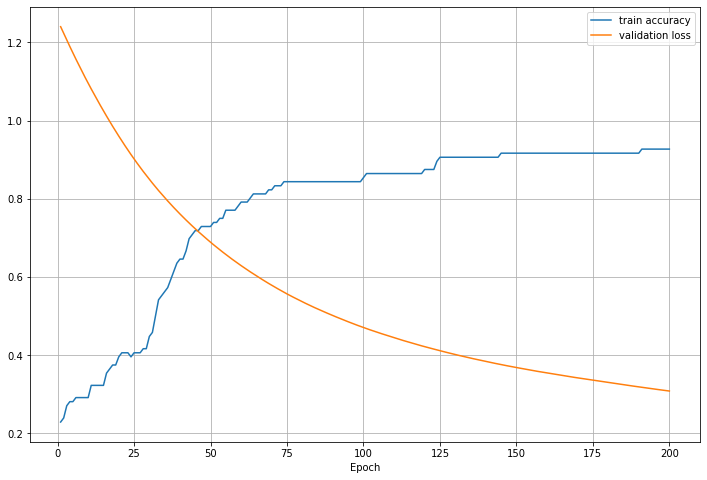

In [29]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')    # 단조감소 함수(0에 수렴하는 방향) -> 학습을 더 하게 되면 개선될 여지가 있다. 
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

- Epoch 횟수를 더 늘려서 학습을 해보자

In [38]:
model2 = Sequential([
    Dense(16, input_dim=4, activation='relu'),   
    Dense(3, activation='softmax')               
])

In [39]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history2 = model2.fit(
    X_train, Y_train, validation_split=0.2, epochs=1000, batch_size=50, verbose=0
)

In [42]:
model2.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.1334 - accuracy: 0.9000


[0.13342145085334778, 0.8999999761581421]

In [43]:
y_acc = history2.history['accuracy']
y_vloss = history2.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

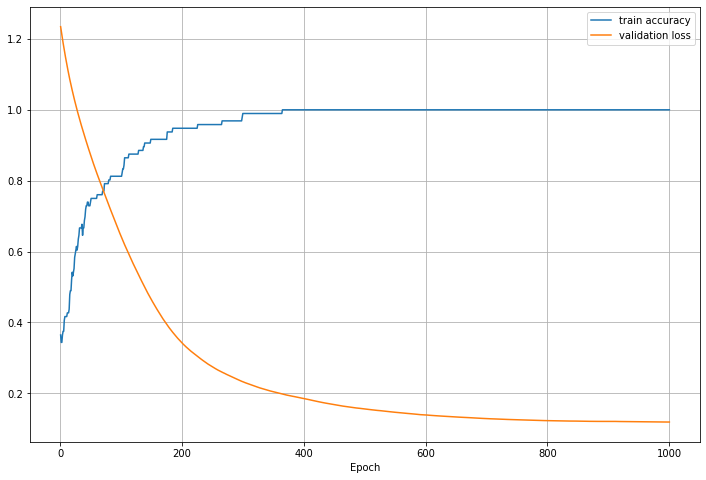

In [44]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')    # 단조감소 함수(0에 수렴하는 방향) -> 학습을 더 하게 되면 개선될 여지가 있다. 
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()
# 400회 이상부터는 과적합되었다고 볼 수 있다. => 400회 이상부터는 모두 정답
#   test_data에 별로 좋지 않은 모양
# validation loss가 줄어들기만 함 => 테스트에 의미가 없다.
# 정형화된 데이터는 데이터 개수가 한정적이어서 데이터 분석에 의미가 없다.
# 정형화된 데이터는 신경망보다 앙상블 또는 XGBoost가 더 분석을 잘 한다.

In [37]:
del model2